In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 256
x_test = x_test.astype('float32') / 256

print(x_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28)


In [7]:
# 딥러닝에서 트레이닝 하려면 1 차원으로 바꿔야함
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [8]:
input_layer = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_layer) # FunctionalAPI 
decoded = Dense(784, activation='sigmoid')(encoded)

In [9]:
autoencoder = Model(input_layer, decoded)

In [10]:
encoder = Model(input_layer, encoded)

In [11]:
input_layer_decoder = Input(shape=(64,))
decoder_layer = autoencoder.layers[-1](input_layer_decoder)
decoder = Model(input_layer_decoder,decoder_layer)

In [12]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,200 (395.31 KB)

 Trainable params: 101,200 (395.31 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train,x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test,x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3506 - val_loss: 0.1653
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1546 - val_loss: 0.1276
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1231 - val_loss: 0.1082
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1060 - val_loss: 0.0973
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0965 - val_loss: 0.0905
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0902 - val_loss: 0.0858
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0859 - val_loss: 0.0826
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0827 - val_loss: 0.0803
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0805 - val_loss: 0.0788
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0794 - val_loss: 0.0776
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0782 - val_loss: 0.0769
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [14]:
encoded_images = encoder.predict(x_test)
decoded_images = decoder.predict(encoded_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step


In [15]:
def visualize(data, size):
    n = 8
    plt.figure(figsize=(20,4))
    plt.gray()
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(data[i].reshape(size,size))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

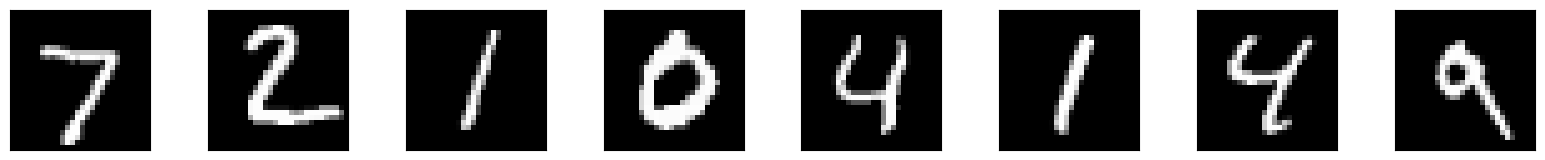

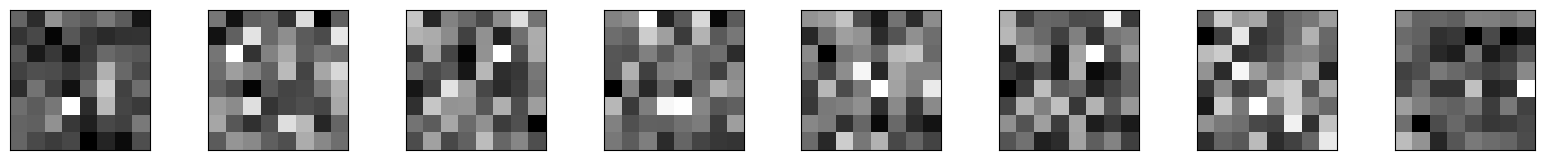

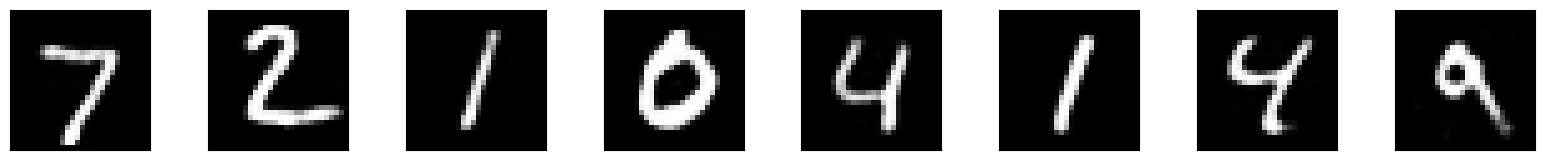

In [16]:
visualize(x_test, 28)
visualize(encoded_images, 8)
visualize(decoded_images, 28)

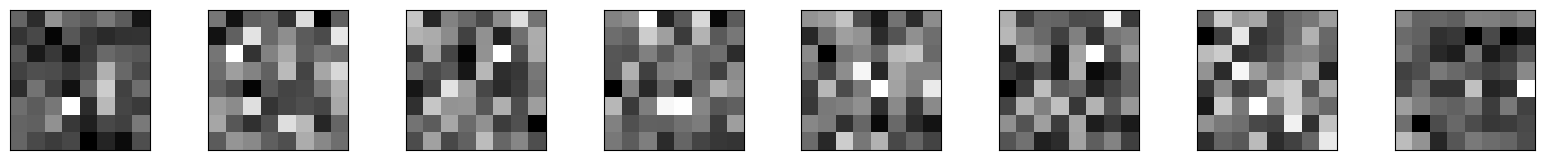

In [17]:
visualize(encoded_images, 8)

In [18]:
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

In [19]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()